Python script for calculating the protein enrichment or depletion abundance values for the top 10 (adjustable) proteins present in the  proteomic dataset.

---

Plots the log2 abundance vs protein name plot

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Select processed proteomics file for analysis; files should be run first through Proteomic_Data_Perseus_to_df.ipynb

In [3]:
abund_file = '/content/drive/MyDrive/ProteinCoronaPredict_PayneLab/Input_Data/Proteomics/Abundance_Files/Bov Swiss Intensity _v1.csv'

Determine top 10 (adjustable) proteins in proteomic data

*   column 50 = FBS control sample
*   columns 31-49 = protein corona samples



In [4]:
df = pd.read_csv(abund_file, header=0)
grouped_dfs = []

np_data = df.columns[4:22]
fbs_control = df.columns[23]
protein_col = 'Entry'

# Calculate total abundance for protein corona samples
df['Total_NP_Abundance'] = df[np_data].sum(axis=1)

# Get the top 15 rows with the highest 'Total_NP_Abundance'
top_1 = df.nlargest(1, 'Total_NP_Abundance')

# Print the corresponding 'Entry' column and 'Total_NP_Abundance' values
print(top_1[[protein_col, 'Total_NP_Abundance']])



    Entry  Total_NP_Abundance
0  P02769           543.90435


In [5]:
# Print the corresponding 'Entry' column, 'Total_NP_Abundance', and columns in np_data
top_1_table = top_1[[protein_col, 'Total_NP_Abundance'] + list(np_data)]
print(top_1_table)

    Entry  Total_NP_Abundance         31         32         33         34  \
0  P02769           543.90435  15.848661  19.892221  17.616806  19.901283   

          35         36         37         38         39         40  \
0  30.394498  33.385218  41.411284  26.935202  32.543373  33.706021   

          41         42         43         44       45         46         47  \
0  42.727328  27.328053  43.501542  35.540038  46.0186  36.938653  23.366569   

       48  
0  16.849  


Calculate the log2 fold change for protein abundance

In [6]:
# Calculate the log2 fold change for each column in np_data and fbs_control
log2_fold_change = np.log2(top_1[np_data].div(top_1[fbs_control], axis=0))

# Add the 'Entry' column for reference
log2_fold_change[protein_col] = top_1[protein_col].values

# Reorder columns to have 'Entry' first
columns = [protein_col] + list(np_data)
log2_fold_change = log2_fold_change[columns]

# Display the resulting table
print(log2_fold_change)

    Entry        31        32        33        34        35        36  \
0  P02769 -1.777086 -1.449243 -1.624494 -1.448585 -0.837637 -0.702237   

         37        38        39        40        41        42       43  \
0 -0.391423 -1.011954 -0.739083 -0.688441 -0.346288 -0.991064 -0.32038   

         44       45        46        47        48  
0 -0.612002 -0.23923 -0.556316 -1.217001 -1.688784  


Determine protein names that correspond with protein 'Entry' ID

---

Make plot that has x-axis with protein names

In [7]:
print(top_1[['prot2', 'Total_NP_Abundance']])

# Add the 'Entry' column for reference
log2_fold_change['prot2'] = top_1['prot2'].values

# Melt the DataFrame for easier plotting
melted_data = log2_fold_change.melt(id_vars=['prot2'], value_vars=np_data,
                                    var_name='Sample', value_name='Log2_Fold_Change')


      prot2  Total_NP_Abundance
0  Albumin            543.90435


In [8]:
# new_legend_items = {
#     '31': 'Carboxyl-PS 200 nm NP, 10% FBS',
#     '32': 'Carboxyl-PS 200 nm NP, 100% FBS',
#     '33': 'Citrate-mNPs, 10% FBS',
#     '34': 'Citrate-mNPl, 10% FBS',
#     '35': 'PEI-mNPs, 10% FBS',
#     '36': 'PEI-mNPl, 10% FBS',
#     '37': 'PVP-Au-mNPl, 100% FBS',
#     '38': 'PVP-Au-mNPs, 10% FBS',
#     '39': 'PVP-Au-mNPs, 100% FBS',
#     '40': 'Citrate-mNPl, 100% FBS',
#     '41': 'PEI-mNPl, 100% FBS',
#     '42': 'Citrate-mNPs, 100% FBS',
#     '43': 'PEI-mNPs, 100% FBS',
#     '44': 'PEI-Au-mNPl, 10% FBS',
#     '45': 'PEG-Au-mNPl, 100% FBS',
#     '46': 'PEI-Au-mNPl, 100% FBS',
#     '47': 'PEI-Au-mNPs, 100% FBS',
#     '48': 'PEG-Carboxyl NP, 100% FBS',
#     '49': 'PEG-Carboxyl NP, 100% FBS (b)',
# }

new_legend_items = {
    '31': 'COOH-pNP, 10% FBS',
    '32': 'COOH-pNP, 100% FBS',
    '33': 'Citrate-mNP$_S$, 10% FBS',
    '34': 'Citrate-mNP$_L$, 10% FBS',
    '35': 'PEI-mNP$_S$, 10% FBS',
    '36': 'PEI-mNP$_L$, 10% FBS',
    '37': 'PVP-Au-mNP$_L$, 100% FBS',
    '38': 'PVP-Au-mNP$_S$, 10% FBS',
    '39': 'PVP-Au-mNP$_S$, 100% FBS',
    '40': 'Citrate-mNP$_L$, 100% FBS',
    '41': 'PEI-mNP$_L$, 100% FBS',
    '42': 'Citrate-mNP$_S$, 100% FBS',
    '43': 'PEI-mNP$_S$, 100% FBS',
    '44': 'PEI-Au-mNP$_L$, 10% FBS',
    '45': 'PEG-Au-mNP$_L$, 100% FBS',
    '46': 'PEI-Au-mNP$_L$, 100% FBS',
    '47': 'PEI-Au-mNP$_S$, 100% FBS',
    '48': 'PEG-pNP, 100% FBS',
    #'49': 'PEG-pNP, 100% FBS (b)',
}



# Map the 'Sample' column in melted_data to the new sample names
melted_data['Sample'] = melted_data['Sample'].map(new_legend_items)


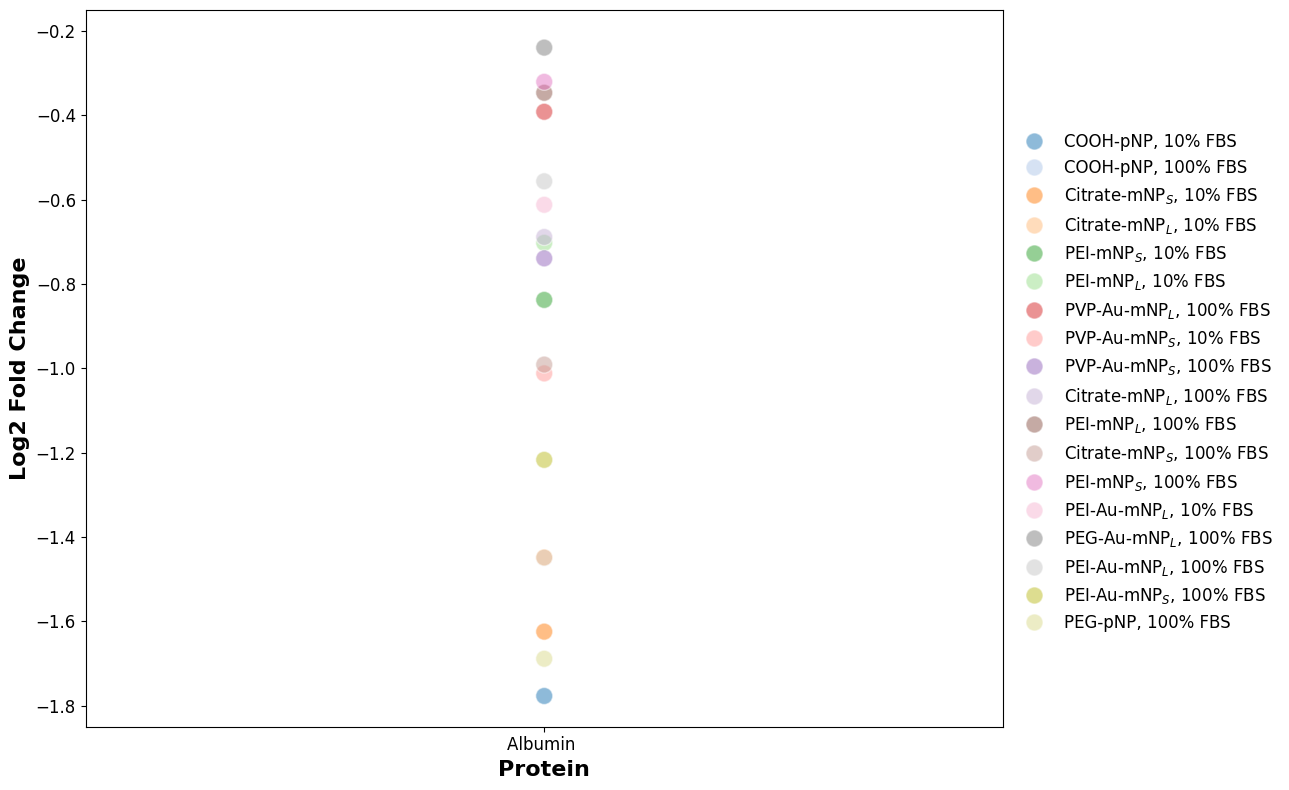


Legend Items and their Descriptions:
31: COOH-pNP, 10% FBS
32: COOH-pNP, 100% FBS
33: Citrate-mNP$_S$, 10% FBS
34: Citrate-mNP$_L$, 10% FBS
35: PEI-mNP$_S$, 10% FBS
36: PEI-mNP$_L$, 10% FBS
37: PVP-Au-mNP$_L$, 100% FBS
38: PVP-Au-mNP$_S$, 10% FBS
39: PVP-Au-mNP$_S$, 100% FBS
40: Citrate-mNP$_L$, 100% FBS
41: PEI-mNP$_L$, 100% FBS
42: Citrate-mNP$_S$, 100% FBS
43: PEI-mNP$_S$, 100% FBS
44: PEI-Au-mNP$_L$, 10% FBS
45: PEG-Au-mNP$_L$, 100% FBS
46: PEI-Au-mNP$_L$, 100% FBS
47: PEI-Au-mNP$_S$, 100% FBS
48: PEG-pNP, 100% FBS


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

#print('All NPs at 10% Protein Incubation') # options are: Magnetic 10% Protein, Magnetic 100% Protein, Nonmagnetic

# Specify the subset of NPs you want to display on the plot
selected_samples = [
    'COOH-pNP, 10% FBS',
    'COOH-pNP, 100% FBS',
    'Citrate-mNP$_S$, 10% FBS',
    'Citrate-mNP$_L$, 10% FBS',
    'PEI-mNP$_S$, 10% FBS',
    'PEI-mNP$_L$, 10% FBS',
    'PVP-Au-mNP$_L$, 100% FBS',
    'PVP-Au-mNP$_S$, 10% FBS',
    'PVP-Au-mNP$_S$, 100% FBS',
    'Citrate-mNP$_L$, 100% FBS',
    'PEI-mNP$_L$, 100% FBS',
    'Citrate-mNP$_S$, 100% FBS',
    'PEI-mNP$_S$, 100% FBS',
    'PEI-Au-mNP$_L$, 10% FBS',
    'PEG-Au-mNP$_L$, 100% FBS',
    'PEI-Au-mNP$_L$, 100% FBS',
    'PEI-Au-mNP$_S$, 100% FBS',
    'PEG-pNP, 100% FBS',
]

# Filter the melted_data to include only the selected NPs
filtered_data = melted_data[melted_data['Sample'].isin(selected_samples)]

# Create the plot
plt.figure(figsize=(13, 8))

sns.scatterplot(data=filtered_data, x='prot2', y='Log2_Fold_Change', hue='Sample',
                palette='tab20', s=150, alpha=0.5)

# Add a dashed line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--')

# Set the y-axis limits
plt.ylim(-1.85, -.15)

# Customize the x-axis labels rotation and font size
plt.xticks(rotation=0, fontsize=12) #ha='right'

# Customize the y-axis font size
plt.yticks(fontsize=12)

# Customize the legend
plt.legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 0.85), fontsize=12, title_fontsize='18', frameon=False)

# Labels and title with increased font sizes

plt.xlabel('Protein', fontsize=16, fontweight='bold')
plt.ylabel('Log2 Fold Change', fontsize=16, fontweight='bold')

#plt.title('Magnetic NPs, 100% Protein', fontweight='bold', fontsize=16)

# Add grid lines
plt.grid(False)

plt.tight_layout()

# Show the plot
plt.show()

#plt.savefig('')
# Print the legend items and their descriptions
print("\nLegend Items and their Descriptions:")
for key, value in new_legend_items.items():
    print(f"{key}: {value}")


### Albumin Only

Old code
---

Plot figure

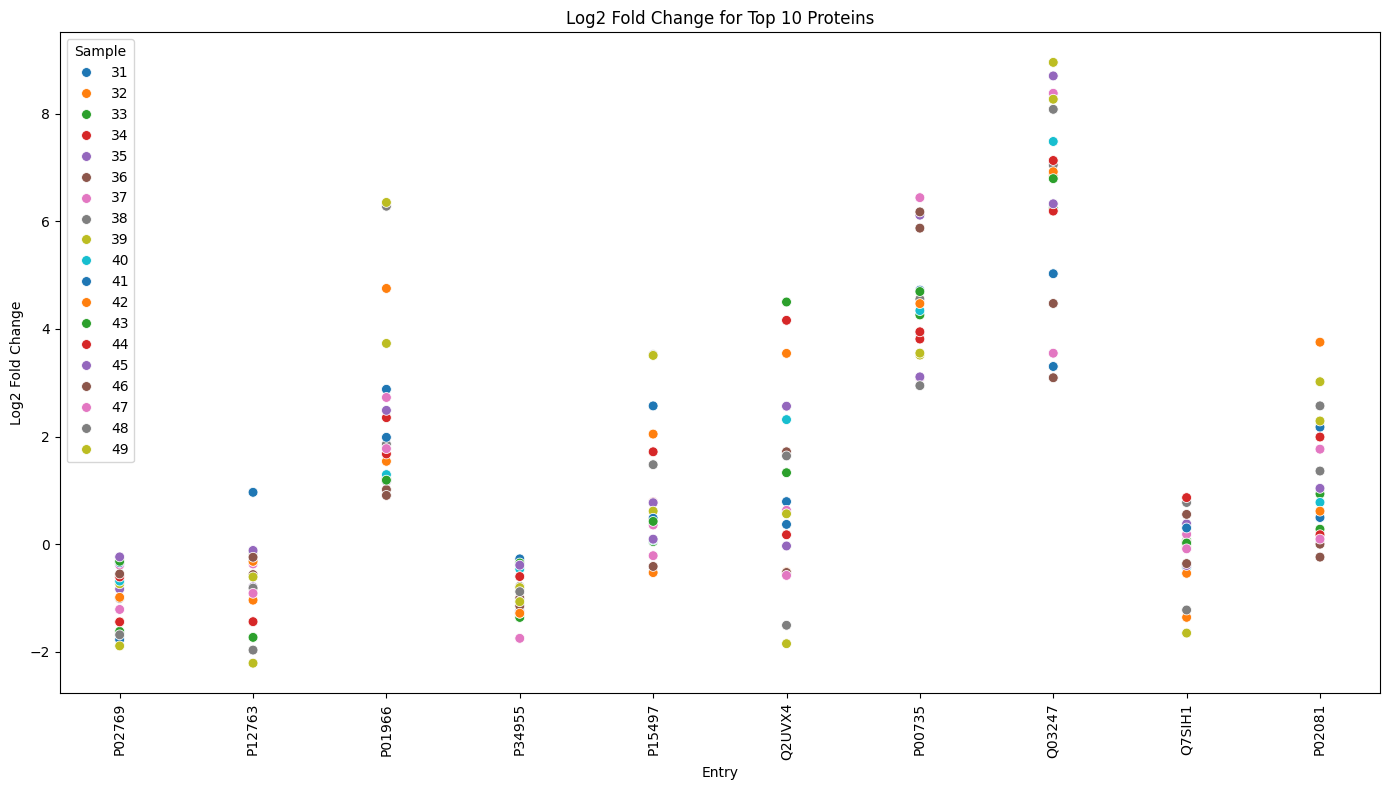

In [ ]:
# Add the 'Entry' column for reference
log2_fold_change[protein_col] = top_10[protein_col].values

# Melt the DataFrame for easier plotting
melted_data = log2_fold_change.melt(id_vars=[protein_col], value_vars=np_data,
                                    var_name='Sample', value_name='Log2_Fold_Change')

# Create the plot
plt.figure(figsize=(14, 8))
sns.scatterplot(data=melted_data, x=protein_col, y='Log2_Fold_Change', hue='Sample', palette='tab10', s=50)
plt.xlabel('Entry')
plt.ylabel('Log2 Fold Change')
plt.title('Log2 Fold Change for Top 10 Proteins')
plt.xticks(rotation=90)
plt.legend(title='Sample')
plt.tight_layout()

# Show the plot
plt.show()

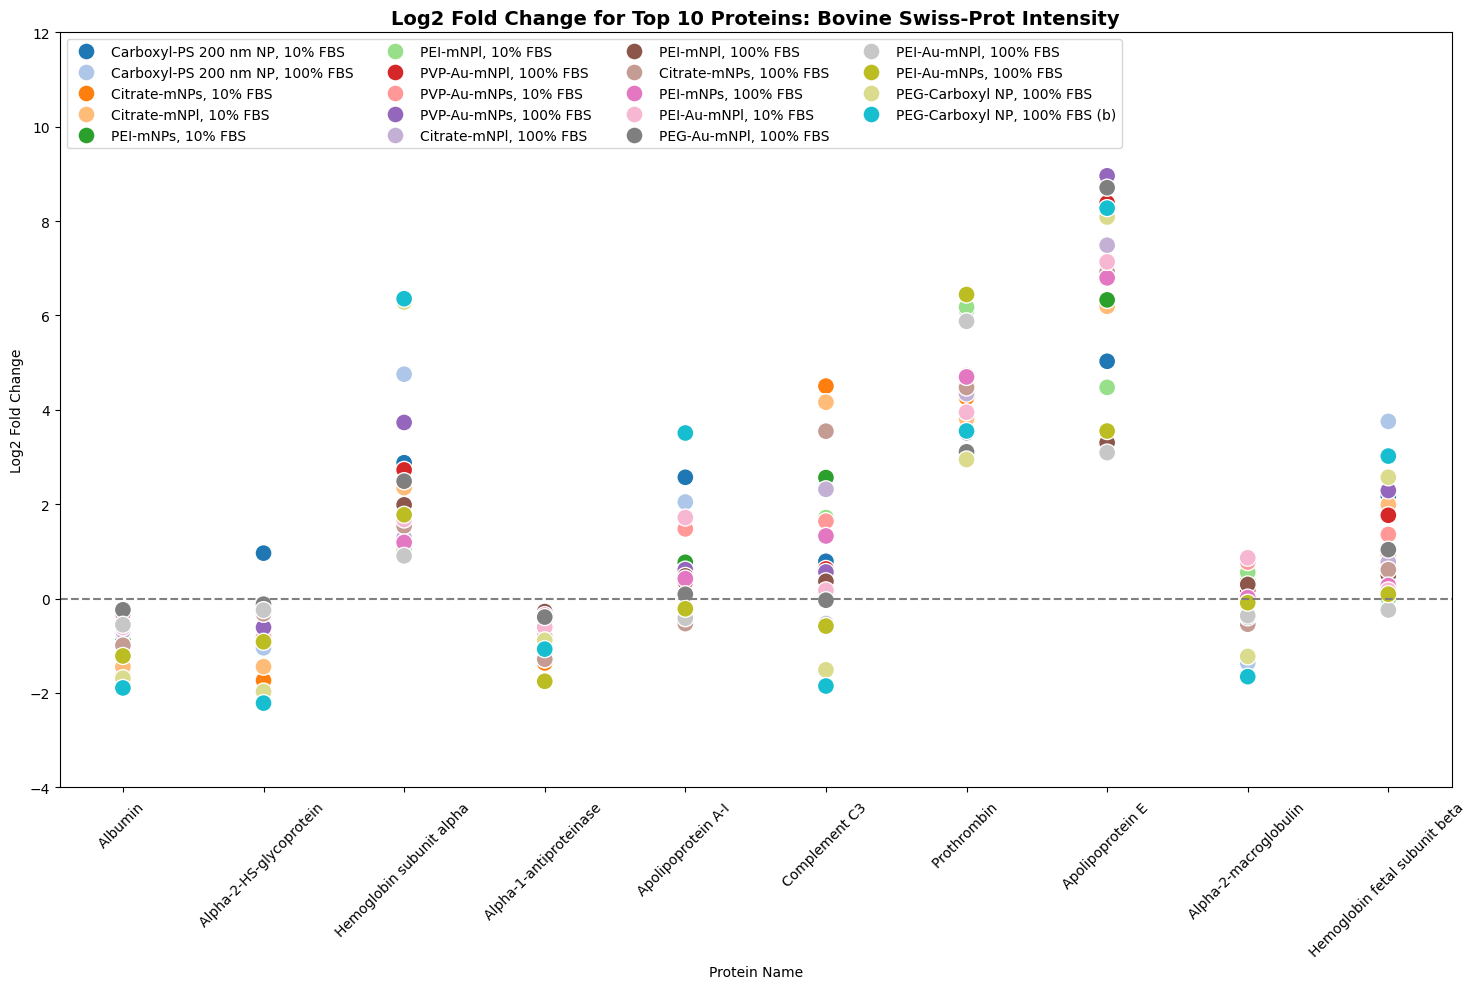


Legend Items and their Descriptions:
31: Carboxyl-PS 200 nm NP, 10% FBS
32: Carboxyl-PS 200 nm NP, 100% FBS
33: Citrate-mNPs, 10% FBS
34: Citrate-mNPl, 10% FBS
35: PEI-mNPs, 10% FBS
36: PEI-mNPl, 10% FBS
37: PVP-Au-mNPl, 100% FBS
38: PVP-Au-mNPs, 10% FBS
39: PVP-Au-mNPs, 100% FBS
40: Citrate-mNPl, 100% FBS
41: PEI-mNPl, 100% FBS
42: Citrate-mNPs, 100% FBS
43: PEI-mNPs, 100% FBS
44: PEI-Au-mNPl, 10% FBS
45: PEG-Au-mNPl, 100% FBS
46: PEI-Au-mNPl, 100% FBS
47: PEI-Au-mNPs, 100% FBS
48: PEG-Carboxyl NP, 100% FBS
49: PEG-Carboxyl NP, 100% FBS (b)


In [ ]:
# Create the plot
plt.figure(figsize=(15, 10))

sns.scatterplot(data=melted_data, x='prot2', y='Log2_Fold_Change', hue='Sample', palette='tab20', s=150)

# Add a dashed line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--')

# Set the y-axis limits
plt.ylim(-4, 12)
# Customize the x-axis labels rotation
plt.xticks(rotation=45)

# Customize the legend
plt.legend(loc='upper left', ncol=4)

# Labels and title
plt.xlabel('Protein Name')
plt.ylabel('Log2 Fold Change')
plt.title('Log2 Fold Change for Top 10 Proteins: Bovine Swiss-Prot Intensity', fontweight='bold', fontsize=14)

plt.tight_layout()

# Show the plot
plt.show()


# Print the legend items and their descriptions
print("\nLegend Items and their Descriptions:")
for key, value in new_legend_items.items():
    print(f"{key}: {value}")